In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [21]:
# Assuming the dataset is stored in a CSV file named 'titanic.csv'
df = pd.read_csv('titanic.csv')

# Display the first few rows to understand the structure of the dataset
print(df.head(3))


   pclass  survived                            name     sex      age  sibsp  \
0     1.0       1.0   Allen, Miss. Elisabeth Walton  female  29.0000    0.0   
1     1.0       1.0  Allison, Master. Hudson Trevor    male   0.9167    1.0   
2     1.0       0.0    Allison, Miss. Helen Loraine  female   2.0000    1.0   

   parch  ticket      fare    cabin embarked boat  body  \
0    0.0   24160  211.3375       B5        S    2   NaN   
1    2.0  113781  151.5500  C22 C26        S   11   NaN   
2    2.0  113781  151.5500  C22 C26        S  NaN   NaN   

                         home.dest  
0                     St Louis, MO  
1  Montreal, PQ / Chesterville, ON  
2  Montreal, PQ / Chesterville, ON  


In [22]:
# Check for missing values
print(df.isnull().sum())

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64


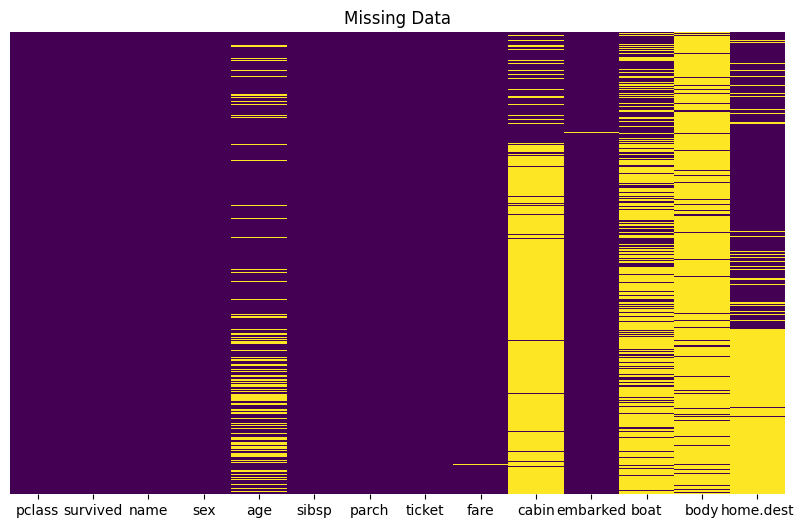

In [23]:

# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', yticklabels=False, cbar=False)
plt.title('Missing Data')
plt.show()


In [24]:
# Drop rows where 'survived' is NaN (if any, though typically 'survived' shouldn't be NaN)
df.dropna(subset=['survived'], inplace=True)

# Fill missing values in 'age' with the mean age
df['age'].fillna(df['age'].mean(), inplace=True)

# Fill missing values in 'fare' with the median fare
df['fare'].fillna(df['fare'].median(), inplace=True)

# Drop columns 'cabin', 'boat', 'body', and 'home.dest' due to high number of missing values
df.drop(['cabin', 'boat', 'body', 'home.dest'], axis=1, inplace=True)

# Drop any remaining rows with missing values in 'embarked'
df.dropna(subset=['embarked'], inplace=True)

C:\Users\dell\AppData\Local\Temp\ipykernel_4256\2315817158.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].mean(), inplace=True)
C:\Users\dell\AppData\Local\Temp\ipykernel_4256\2315817158.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [25]:
# Verify no more missing values
print("\nMissing Values After Cleaning:")
print(df.isnull().sum())


Missing Values After Cleaning:
pclass      0
survived    0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
dtype: int64


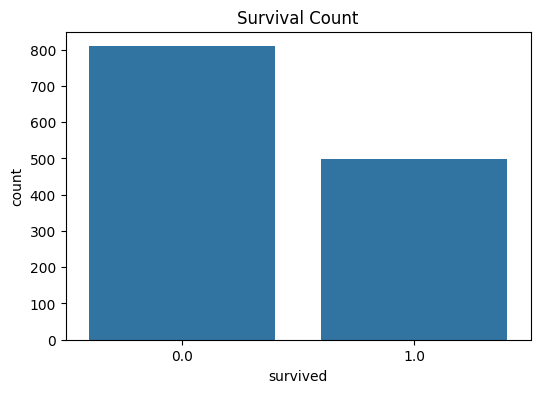

Survival Percentage:
survived
0.0    61.897475
1.0    38.102525
Name: proportion, dtype: float64


In [26]:
# Countplot of passengers who survived vs. did not survive
plt.figure(figsize=(6, 4))
sns.countplot(x='survived', data=df)
plt.title('Survival Count')
plt.show()

# Percentage of passengers who survived
survival_percentage = df['survived'].value_counts(normalize=True) * 100
print('Survival Percentage:')
print(survival_percentage)


In [27]:
# Print survival percentage
print('Survival Percentage:')
survival_percentage = df['survived'].value_counts(normalize=True) * 100
print(survival_percentage)

# Print average age
average_age = df['age'].mean()
print(f'Average age of passengers: {average_age:.2f} years')

# Print insights about passenger class and survival
print('\nSurvival by Passenger Class:')
survival_by_class = df.groupby('pclass')['survived'].mean() * 100
print(survival_by_class)

# Print insights about survival by gender
print('\nSurvival by Gender:')
survival_by_gender = df.groupby('sex')['survived'].mean() * 100
print(survival_by_gender)


Survival Percentage:
survived
0.0    61.897475
1.0    38.102525
Name: proportion, dtype: float64
Average age of passengers: 29.85 years

Survival by Passenger Class:
pclass
1.0    61.682243
2.0    42.960289
3.0    25.528914
Name: survived, dtype: float64

Survival by Gender:
sex
female    72.629310
male      19.098458
Name: survived, dtype: float64


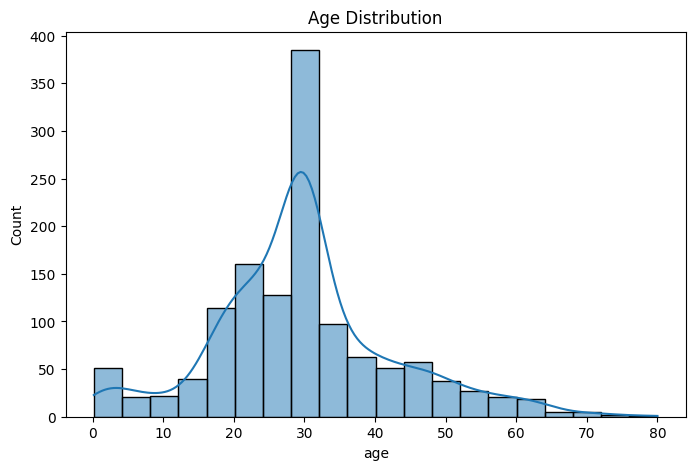

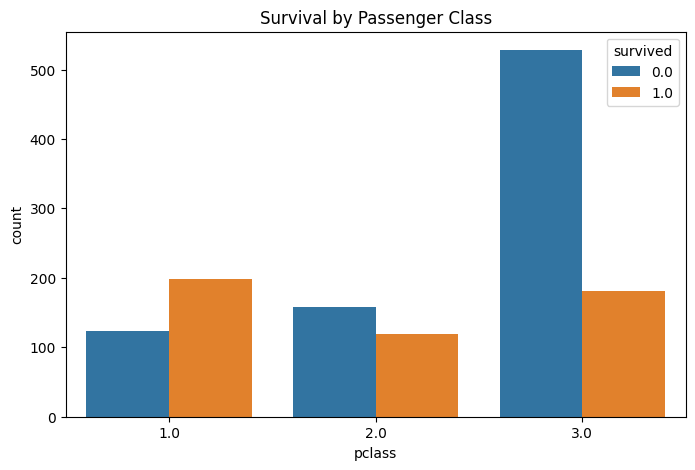

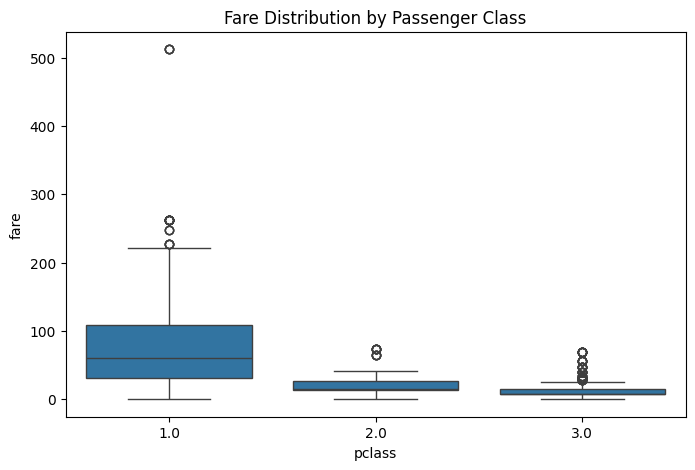

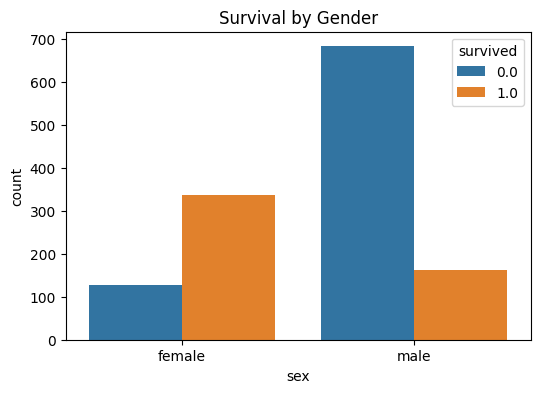

In [29]:


# Distribution of age among passengers
plt.figure(figsize=(8, 5))
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.show()

# Countplot of survival based on passenger class
plt.figure(figsize=(8, 5))
sns.countplot(x='pclass', hue='survived', data=df)
plt.title('Survival by Passenger Class')
plt.show()

# Boxplot of fare distribution by passenger class
plt.figure(figsize=(8, 5))
sns.boxplot(x='pclass', y='fare', data=df)
plt.title('Fare Distribution by Passenger Class')
plt.show()

# Countplot of survival based on gender
plt.figure(figsize=(6, 4))
sns.countplot(x='sex', hue='survived', data=df)
plt.title('Survival by Gender')
plt.show()
